## Codificador de Variables Categoricas

In [1]:
import pandas as pd# names of columns, as per description
cols_names = ['Class', 'age', 'menopause', 'tumor-size',
              'inv-nodes', 'node-caps', 'deg-malig', 'breast',
              'breast-quad', 'irradiat']# read the data
df = (pd.read_csv('/data/UMG/ProDeGree/Grad I/ML/breast-cancer.data',
                 header=None, names=cols_names)
        .replace({'?': 'unknown'}))  # NaN are represented by '?'


### Mostando el dataset

In [5]:
df.menopause.value_counts(dropna=False)

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64

In [10]:

from sklearn.model_selection import train_test_split  #importamos de scikit
X = df.drop(columns='Class')  #separa la columna "Class" y hacemos una matri X sin esa columna

y = df['Class'].copy()         # hacemos un vector y con la columna "class"

# separamos las matrices X(matriz sin columna "class" ) y y(target vector) para test y train con size de 0.5 y random de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)  



In [25]:
print (y)

0      no-recurrence-events
1      no-recurrence-events
2      no-recurrence-events
3      no-recurrence-events
4      no-recurrence-events
5      no-recurrence-events
6      no-recurrence-events
7      no-recurrence-events
8      no-recurrence-events
9      no-recurrence-events
10     no-recurrence-events
11     no-recurrence-events
12     no-recurrence-events
13     no-recurrence-events
14     no-recurrence-events
15     no-recurrence-events
16     no-recurrence-events
17     no-recurrence-events
18     no-recurrence-events
19     no-recurrence-events
20     no-recurrence-events
21     no-recurrence-events
22     no-recurrence-events
23     no-recurrence-events
24     no-recurrence-events
25     no-recurrence-events
26     no-recurrence-events
27     no-recurrence-events
28     no-recurrence-events
29     no-recurrence-events
               ...         
256       recurrence-events
257       recurrence-events
258       recurrence-events
259       recurrence-events
260       recurrence

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
X_train_ohe = ohe.fit_transform(X_train)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train_le = le.fit_transform(X_train)  # da error por el tipo de datos de las columnas tiene que ser enteros

ValueError: bad input shape (143, 9)

In [7]:
# hacemos la conversion a enteros 

class MultiColumnLabelEncoder:
    def __init__(self, columns = None ):
        self.columns = columns    # lista de columnas a codificar

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        '''
        transforma las columnas de X especificadas en self.columns usando Label_encoder().
        Si no se especifica transforma todas las columans de X
        '''
        salida = X.copy()

        if self.columns is not None:
            for col in self.columns:
                salida[col] = LabelEncoder().fit_transform(salida[col])
        else:
            for colname, col in salida.items():
                salida[colname] = LabelEncoder().fit_transform(col)

        return salida

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

### Tabla ya codificada  en sus columnas categoricas

In [15]:
le = MultiColumnLabelEncoder()
X_train_le = le.fit_transform(X_train)
X_train_le.head()



,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
12,3,1,1,0,0,0,0,4,0
35,0,2,5,0,0,1,0,2,0
28,1,2,7,0,0,1,1,1,0
142,3,0,1,0,0,0,0,2,0
225,1,0,3,3,0,2,1,1,1


In [65]:
X.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# Inguat Dataset

In [239]:
import statsmodels.api as sm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder       # instantiate labelencoder object
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest   #feature selection best features
from sklearn.feature_selection import chi2         # clase chi-cuadrado 
from sklearn.feature_selection import f_classif, f_regression    #clase f_clasificador ANOVA
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.externals import joblib

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.set_option('display.max_rows', 4706)

In [18]:
ds = pd.read_csv('/data/DWeb/inguat-backend/Inguat_isnull.csv')
ds

,Unnamed: 0,SEC_INT,P1,P2$01,P4,DEPTO_MUNI,P7_NO_PERNOC,P7_SI_PERNOC,P9_#EXCURSION,DEP_MUN_LUG,...,VIA_VIAJE,P18_#NOCHES1,P19_#PERSON1,P20_MOTIVO_1,P21_ALOJ_1,P22_PER_GAS_1,P24_VIAJE_ORG,P26_TRASPORTE,P27_DG_SUMA,P17_DESTINO1
0,0,1010084,Si,Vacaciones personales,No dispone de segunda vivienda,NINGUNO,3.0,6.0,1.0,SACATEPEQUEZ_ANTIGUA GUATEMALA_CONVENTO LAS CA...,...,Sí,4.0,4.0,"Ocio, recreo y/o vacaciones",Casa de amigos o familiares,4.0,Por su cuenta,Bus turístico,850.0,TOTONICAPAN_MOMOSTENANGO_LOS RISCOS
1,1,1010084,Si,Vacaciones personales,No dispone de segunda vivienda,NINGUNO,3.0,5.0,1.0,SACATEPEQUEZ_ANTIGUA GUATEMALA_CONVENTO LAS CA...,...,No,1.0,4.0,"Ocio, recreo y/o vacaciones",Hotel o similares,4.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_BASILICA
2,3,1010084,Si,Vacaciones personales,No dispone de segunda vivienda,NINGUNO,3.0,10.0,1.0,FALSO,...,Sí,1.0,8.0,"Ocio, recreo y/o vacaciones",Hotel o similares,8.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_IGLESIA DE ESQUIPULAS
3,4,1010084,Si,Vacaciones personales,No dispone de segunda vivienda,NINGUNO,3.0,0.0,1.0,FALSO,...,No,1.0,4.0,"Ocio, recreo y/o vacaciones",Hotel o similares,4.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_BASILICA
4,6,1010084,Si,Día de la independencia 15 de septiembre,No dispone de segunda vivienda,NINGUNO,3.0,10.0,1.0,FALSO,...,Sí,4.0,5.0,"Ocio, recreo y/o vacaciones",Hotel o similares,5.0,Por su cuenta,Vehículo,2000.0,QUETZALTENANGO_QUETZALTENANGO_CENTRO HISTORICO
5,7,1010084,Si,Día de la independencia 15 de septiembre,No dispone de segunda vivienda,NINGUNO,3.0,2.0,1.0,FALSO,...,No,1.0,4.0,"Ocio, recreo y/o vacaciones",Hotel o similares,4.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_BASILICA
6,9,1010098,Si,Noche buena (año 2017),"Sí, es de familiares o amigos",QUICHE_LAS VIGAS,3.0,1.0,1.0,FALSO,...,Sí,2.0,2.0,"Ocio, recreo y/o vacaciones",Hotel o similares,2.0,Paquete turístico,Bus turístico,1300.0,ALTAVERAPAZ_COBAN_SEMUC CHAMPEY
7,10,1010098,Si,Noche buena (año 2017),"Sí, es de familiares o amigos",QUICHE_LAS VIGAS,3.0,1.0,1.0,FALSO,...,Sí,2.0,2.0,"Ocio, recreo y/o vacaciones",Hotel o similares,2.0,Paquete turístico,Bus turístico,800.0,HUEHUETENANGO_HUEHUETENANGO_CENOTES DE CANDELARIA
8,11,1010098,Si,Noche buena (año 2017),"Sí, es de familiares o amigos",QUICHE_LAS VIGAS,3.0,1.0,1.0,FALSO,...,No,1.0,4.0,"Ocio, recreo y/o vacaciones",Hotel o similares,4.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_BASILICA
9,12,27010024,Si,Año nuevo (año 2017),No dispone de segunda vivienda,NINGUNO,3.0,5.0,3.0,CHIQUMULA_ESQUIPULAS_BASILICAS,...,Sí,2.0,6.0,"Ocio, recreo y/o vacaciones",Casa de amigos o familiares,6.0,Por su cuenta,Vehículo,2150.0,SANTA ROSA_CHIQUIMULA_MONTERRICO


In [100]:
ds = ds.drop(ds.iloc[:,[0]], axis=1)
ds.shape


,P2$01,P4,DEPTO_MUNI,P7_NO_PERNOC,P7_SI_PERNOC,P9_#EXCURSION,DEP_MUN_LUG,P11_MOTIVO_EXCURSION,P13_GASTO_EXCURSION,P14_#PER_EXCURSION,...,VIA_VIAJE,P18_#NOCHES1,P19_#PERSON1,P20_MOTIVO_1,P21_ALOJ_1,P22_PER_GAS_1,P24_VIAJE_ORG,P26_TRASPORTE,P27_DG_SUMA,P17_DESTINO1
0,Vacaciones personales,No dispone de segunda vivienda,NINGUNO,3.0,6.0,1.0,SACATEPEQUEZ_ANTIGUA GUATEMALA_CONVENTO LAS CA...,"Ocio, recreo y/o vacaciones",400.0,5.0,...,Sí,4.0,4.0,"Ocio, recreo y/o vacaciones",Casa de amigos o familiares,4.0,Por su cuenta,Bus turístico,850.0,TOTONICAPAN_MOMOSTENANGO_LOS RISCOS
1,Vacaciones personales,No dispone de segunda vivienda,NINGUNO,3.0,5.0,1.0,SACATEPEQUEZ_ANTIGUA GUATEMALA_CONVENTO LAS CA...,"Ocio, recreo y/o vacaciones",400.0,5.0,...,No,1.0,4.0,"Ocio, recreo y/o vacaciones",Hotel o similares,4.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_BASILICA
2,Vacaciones personales,No dispone de segunda vivienda,NINGUNO,3.0,10.0,1.0,FALSO,"Ocio, recreo y/o vacaciones",500.0,4.0,...,Sí,1.0,8.0,"Ocio, recreo y/o vacaciones",Hotel o similares,8.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_IGLESIA DE ESQUIPULAS
3,Vacaciones personales,No dispone de segunda vivienda,NINGUNO,3.0,0.0,1.0,FALSO,"Ocio, recreo y/o vacaciones",500.0,4.0,...,No,1.0,4.0,"Ocio, recreo y/o vacaciones",Hotel o similares,4.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_BASILICA
4,Día de la independencia 15 de septiembre,No dispone de segunda vivienda,NINGUNO,3.0,10.0,1.0,FALSO,"Ocio, recreo y/o vacaciones",500.0,4.0,...,Sí,4.0,5.0,"Ocio, recreo y/o vacaciones",Hotel o similares,5.0,Por su cuenta,Vehículo,2000.0,QUETZALTENANGO_QUETZALTENANGO_CENTRO HISTORICO
5,Día de la independencia 15 de septiembre,No dispone de segunda vivienda,NINGUNO,3.0,2.0,1.0,FALSO,"Ocio, recreo y/o vacaciones",500.0,4.0,...,No,1.0,4.0,"Ocio, recreo y/o vacaciones",Hotel o similares,4.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_BASILICA
6,Noche buena (año 2017),"Sí, es de familiares o amigos",QUICHE_LAS VIGAS,3.0,1.0,1.0,FALSO,"Ocio, recreo y/o vacaciones",500.0,4.0,...,Sí,2.0,2.0,"Ocio, recreo y/o vacaciones",Hotel o similares,2.0,Paquete turístico,Bus turístico,1300.0,ALTAVERAPAZ_COBAN_SEMUC CHAMPEY
7,Noche buena (año 2017),"Sí, es de familiares o amigos",QUICHE_LAS VIGAS,3.0,1.0,1.0,FALSO,"Ocio, recreo y/o vacaciones",500.0,4.0,...,Sí,2.0,2.0,"Ocio, recreo y/o vacaciones",Hotel o similares,2.0,Paquete turístico,Bus turístico,800.0,HUEHUETENANGO_HUEHUETENANGO_CENOTES DE CANDELARIA
8,Noche buena (año 2017),"Sí, es de familiares o amigos",QUICHE_LAS VIGAS,3.0,1.0,1.0,FALSO,"Ocio, recreo y/o vacaciones",500.0,4.0,...,No,1.0,4.0,"Ocio, recreo y/o vacaciones",Hotel o similares,4.0,Por su cuenta,Vehículo,0.0,CHIQUIMULA_ESQUIPULAS_BASILICA
9,Año nuevo (año 2017),No dispone de segunda vivienda,NINGUNO,3.0,5.0,3.0,CHIQUMULA_ESQUIPULAS_BASILICAS,Religión y peregrinación,1500.0,6.0,...,Sí,2.0,6.0,"Ocio, recreo y/o vacaciones",Casa de amigos o familiares,6.0,Por su cuenta,Vehículo,2150.0,SANTA ROSA_CHIQUIMULA_MONTERRICO


In [103]:
class EncoderXY:
    def __init__(self, columns = None ):
        self.columns = columns    # lista de columnas a codificar

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        '''
        transforma las columnas de X especificadas en self.columns usando Label_encoder().
        Si no se especifica transforma todas las columans de X
        '''
        salida = X.copy()

        if self.columns is not None:
            for col in self.columns:
                salida[col] = LabelEncoder().fit_transform(salida[col])
        else:
            for colname, col in salida.items():
                salida[colname] = LabelEncoder().fit_transform(col)

        return salida

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [104]:
EncodLabel = EncoderXY()
X_le = EncodLabel.fit_transform(X)
X_le.head()


,P2$01,P4,DEPTO_MUNI,P7_NO_PERNOC,P7_SI_PERNOC,P9_#EXCURSION,DEP_MUN_LUG,P11_MOTIVO_EXCURSION,P13_GASTO_EXCURSION,P14_#PER_EXCURSION,...,VIA_VIAJE,P18_#NOCHES1,P19_#PERSON1,P20_MOTIVO_1,P21_ALOJ_1,P22_PER_GAS_1,P24_VIAJE_ORG,P26_TRASPORTE,P27_DG_SUMA,P17_DESTINO1
0,14,0,102,2,6,0,428,1,25,4,...,1,4,3,5,2,4,2,1,150,1131
1,14,0,102,2,5,0,428,1,25,4,...,0,1,3,5,3,4,2,5,0,139
2,14,0,102,2,9,0,153,1,27,3,...,1,1,7,5,3,8,2,5,0,157
3,14,0,102,2,0,0,153,1,27,3,...,0,1,3,5,3,4,2,5,0,139
4,3,0,102,2,9,0,153,1,27,3,...,1,4,4,5,3,5,2,5,280,690


In [108]:
X = X_le.drop(columns='DEP_MUN_LUG')  #separa la columna "Class" y hacemos una matri X sin esa columna

y = X_le['DEP_MUN_LUG'].copy()         # hacemos un vector y con la columna "class"

y.head()

0    428
1    428
2    153
3    153
4    153
Name: DEP_MUN_LUG, dtype: int64

# f_regression

In [110]:
X_clf = SelectKBest(score_func=f_regression,k=10).fit_transform(X, y)
print(X_clf[:10])

[[  14    0    0    1    4   10    0    4    1 1131]
 [  14    0    0    1    4   10    0    1    5  139]
 [  14    0    0    1    3    7    0    1    5  157]
 [  14    0    0    1    3    7    0    1    5  139]
 [   3    0    0    1    3   17    0    4    5  690]
 [   3    0    0    1    3   17    0    1    5  139]
 [   9    1    0    1    3    9    1    2    1   56]
 [   9    1    0    1    3    9    1    2    1  430]
 [   9    1    0    1    3    9    1    1    5  139]
 [   0    0    2    3    5   11    0    2    5  986]]


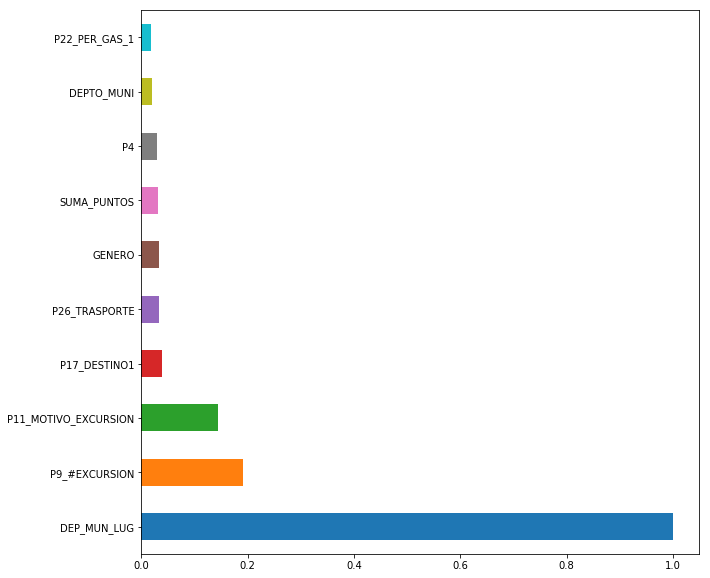

DEP_MUN_LUG             1.000000
P9_#EXCURSION           0.190871
P11_MOTIVO_EXCURSION    0.143746
P17_DESTINO1            0.039509
P26_TRASPORTE           0.033916
GENERO                  0.033360
SUMA_PUNTOS             0.030385
P4                      0.029929
DEPTO_MUNI              0.019149
P22_PER_GAS_1           0.018642
PROFESION               0.017118
OCUPACION               0.012275
P21_ALOJ_1              0.012223
P24_VIAJE_ORG           0.003716
EDAD                    0.003287
P27_DG_SUMA            -0.004218
P13_GASTO_EXCURSION    -0.008280
VIA_VIAJE              -0.009210
P16_#EXCUR_CONPERNOC   -0.009365
P19_#PERSON1           -0.009554
P7_NO_PERNOC           -0.009817
P20_MOTIVO_1           -0.021195
P7_SI_PERNOC           -0.025079
P2$01                  -0.027871
P18_#NOCHES1           -0.058428
P14_#PER_EXCURSION     -0.064872
Name: DEP_MUN_LUG, dtype: float64


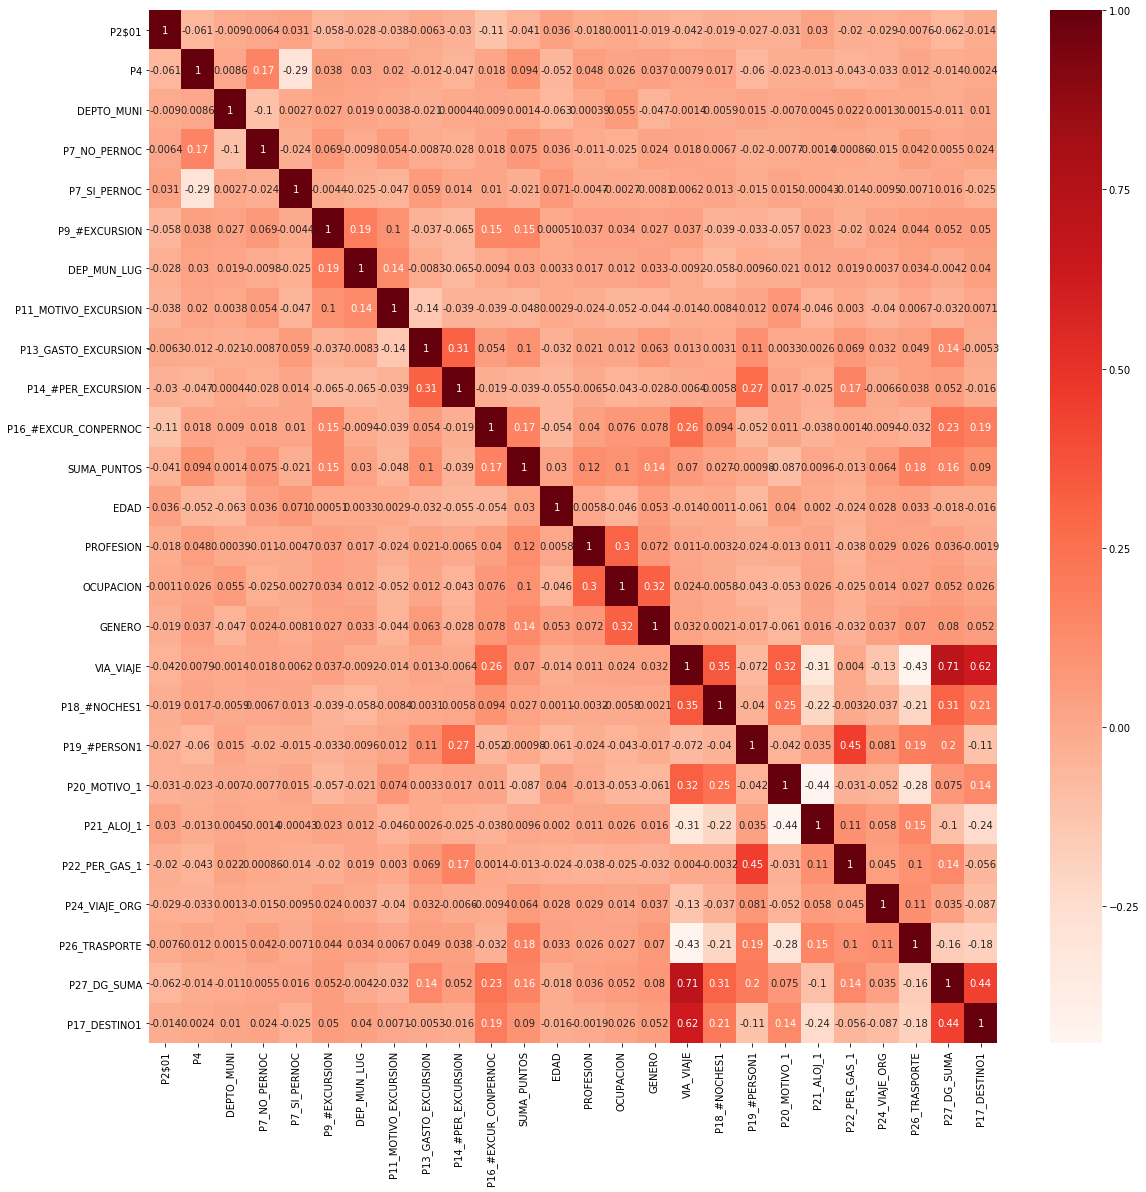

In [120]:
ds_corr = X_le.corr()['DEP_MUN_LUG'].sort_values(ascending=False).head(10)

top_features = ds_corr.index# plot top 20 most correlated features to our target (HEALTH)
ds_corr.plot(kind='barh',figsize=(10,10))
plt.show()        # export selected features to .csv
#df_corr_health.to_csv('feature_selection_CORRELATION.csv')print(df_corr_health)
print(df_corr_health)

plt.figure(figsize=(19,19))
cor = X_le.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

## SelectKBest Chi2

In [127]:
selector = SelectKBest(score_func=chi2, k=20)
fit = selector.fit(X, y)
features = fit.transform(X)
punteo = pd.DataFrame(fit.scores_)
col_set = pd.DataFrame(X.columns)

punteo_features = pd.concat([col_set, punteo], axis= 1)
punteo_features.columns = ['VARIABLE', 'PUNTEO']

print(punteo_features.nlargest(20, 'PUNTEO'))

                VARIABLE         PUNTEO
12             PROFESION  138692.366739
13             OCUPACION  131017.906160
24          P17_DESTINO1  126238.416464
23           P27_DG_SUMA   57864.667746
5          P9_#EXCURSION   15665.782752
11                  EDAD   11915.526734
2             DEPTO_MUNI    9378.359198
7    P13_GASTO_EXCURSION    5215.901364
9   P16_#EXCUR_CONPERNOC    2770.811219
0                  P2$01    2462.448694
6   P11_MOTIVO_EXCURSION    2260.717570
8     P14_#PER_EXCURSION    2219.916326
10           SUMA_PUNTOS    2130.625798
4           P7_SI_PERNOC    1598.495610
1                     P4    1349.186577
20         P22_PER_GAS_1    1299.901480
17          P19_#PERSON1     783.581985
14                GENERO     751.471421
16          P18_#NOCHES1     533.361181
18          P20_MOTIVO_1     505.107344


## f_classif

In [131]:
selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)
features = fit.transform(X)
punteo = pd.DataFrame(fit.scores_)
col_set = pd.DataFrame(X.columns)

punteo_features = pd.concat([col_set, punteo], axis= 1)
punteo_features.columns = ['VARIABLE', 'PUNTEO']

print(punteo_features.nlargest(30, 'PUNTEO'))

                VARIABLE     PUNTEO
6   P11_MOTIVO_EXCURSION  34.602036
5          P9_#EXCURSION  13.394680
8     P14_#PER_EXCURSION  11.204505
7    P13_GASTO_EXCURSION  11.170395
3           P7_NO_PERNOC   5.594210
0                  P2$01   3.232844
10           SUMA_PUNTOS   3.221468
9   P16_#EXCUR_CONPERNOC   3.123430
1                     P4   2.999648
12             PROFESION   2.972888
13             OCUPACION   2.901972
14                GENERO   2.883726
2             DEPTO_MUNI   2.761611
11                  EDAD   2.701451
4           P7_SI_PERNOC   1.340337
21         P24_VIAJE_ORG   1.309136
17          P19_#PERSON1   1.272568
20         P22_PER_GAS_1   1.250818
18          P20_MOTIVO_1   1.020576
22         P26_TRASPORTE   0.970612
19            P21_ALOJ_1   0.916279
24          P17_DESTINO1   0.729675
23           P27_DG_SUMA   0.640573
16          P18_#NOCHES1   0.612509
15             VIA_VIAJE   0.198101


In [135]:
# separamos las matrices X(matriz sin columna "class" ) y y(target vector) para test y train con size de 0.5 y random de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2499, 25) (2499,)
(1072, 25) (1072,)


In [198]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


le = preprocessing.LabelEncoder()
lefit = le.fit(ds.DEP_MUN_LUG)
lefit.transform(ds.DEP_MUN_LUG)
lefit = lefit.inverse_transform(predictions.astype(int))

lis_prediction = pd.value_counts(pd.Series(lefit))
lis_prediction.shape

(167,)

In [212]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, predictions.astype(int))
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.06813091996229836


Score: 0.06852117105809996


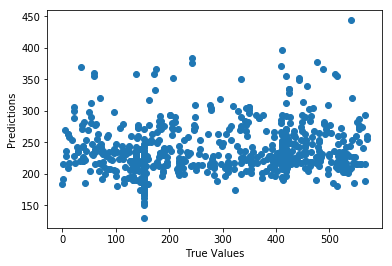

In [209]:
plt.scatter(y_test, predictions.astype(int))
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score:', model.score(X_test, y_test))


844     174
1539     65
3452    153
1727    411
1926    153
2474    374
1352    153
1174    153
1987     13
2281    533
3300    214
944     267
199     493
1378     71
2522    195
801     153
2153    288
1424    567
1421    153
231     536
1779    153
1613      0
2691    419
1973    153
1537    153
1309    260
3407    419
1993      6
1960    153
104     419
2653    153
1487    153
1106    389
2560    305
1320    153
2506    245
2196    153
2730    153
2155     83
2315    153
1924    153
2166    131
2096    153
3483    153
2119    153
3280    153
3413    411
994     306
464     125
1553    153
3457    419
2872    153
1820    343
3329    153
2909    181
212     419
1036    411
3455    137
900     169
1339    153
1345    137
741     153
3138    295
2770    526
1831    153
509     454
597     153
3352    524
981     153
1624    153
3142    567
518     153
3126    153
767     411
2370    411
2025    118
123     529
1675    153
1151    333
819     419
100     342
3139    213
3297    153
2762

In [223]:
#SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)
#SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

#SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
#SVC_prediction
#print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))

#print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))


0.35261194029850745
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
       

/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/hom

In [236]:
Lsvc = LinearSVC()

Lsvc.fit(X_train, y_train)

y_pred = Lsvc.predict(X_test)
#conf_mat = confusion_matrix(y_test, y_pred)
#fig, ax = plt.subplots(figsize=(30,30))

#sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=X_train.columns, yticklabels=X_train.columns)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

print(accuracy_score(y_pred, y_test))

0.061567164179104475


/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [243]:
ds['DEP_MUN_LUG']. ('y_definitions.csv')